# <span style="color:blue"> Esercitazione 05 </span>

#### NOTA PER IL LETTORE:
La struttura che ho scelto di dare a questo documento e di tutti gli altri è la seguente. </p>
Il documento è diviso in più sezioni, ciascuna tipicamente dedicata a un esercizio. Ogni sezione consta di tre sottosezioni: </p>
- una breve sintesi dello scopo e degli obiettivi dell'esercizio ;
- la descrizione del codice implementato ;
- la graficazione dei risultati ottenuti con relativa analisi dati.

## <span style="color:blue"> Esercizio 1 
(code HydrogenAtom.cpp)


### Scopo dell'esercizio

Si richiede di implementare l'algoritmo di Metropolis per campionare la distribuzione di probabilità $|\psi(\textbf{r})|^2$ associata agli orbitali 1s e 2p dell'atomo di idrogeno (in coordinate cartesiane). <p>
Si chiede di calcolare $\langle r \rangle_{1s}$ e $\langle r \rangle_{2p}$, utilizzando due distribuzioni tentative $T(y|x)$ uniforme e gaussiana e confrontando gli esiti nei due casi. 

### Descrizione del codice

Il programma implementa l'algoritmo di Metropolis un blocco alla volta. L'iter qui descritto è stato ripetuto identicamente per le due distribuzioni da campionare e, per ciascuna di esse, utilizzando una probabilità di transizione sia uniforme sia gaussiana.<p>
Sono stati svolti $M=10^6$ esperimenti, divisi in $N=100$ blocchi (il perchè di questa scelta verrà discusso in seguito). Pertanto sono stati utilizzati degli arrays per le coordinate campionate x,y,z di size $L=M/N=10^4$. <p>

La <span style="color:red">prima operazione <span style="color:black">svolta dal main è l'**equilibrazione del sistema**, compiuta dalla funzione *Equilibration*. Si sono inizializzate le coordinate in una opportuna *posizione iniziale* $\textbf{r}$. La posizione scelta è stata la distanza $r$ dal nucleo a cui è massima la probabilità di trovare l'elettrone. Infatti nei casi tridimensionali è spesso più utile lavorare in coordinate sferiche. Si considerino le seguenti relazioni: <p>
$$\rho_{1s}(\textbf{x}) d^3x = \frac{1}{\pi a_0^3} r^2 e^{-2r/a_0} dr d\Omega = \frac{4}{a_0^3} r^2 e^{-2r/a_0} dr = p(r) dr $$
$$\rho_{2p}(\textbf{x}) d^3x = \frac{2}{64 \pi a_0^5} r^4 \cos^2\theta  e^{-r/a_0} dr d\cos\theta d\phi = \frac{1}{16 a_0^5} r^4 e^{-r/a_0} \cos^2\theta dr d\cos\theta = p(r, \cos\theta) dr d\cos\theta $$
Massimizzando le due probabilità $p(r)$ e $p(r, \cos\theta)$ si ottiene :
- $\psi_{1s}$ : $r_{max} = a_0$ ;
- $\psi_{2p}$ : $r_{max} = 4a_0$ ,  $\theta_{max} = \frac{\pi}{2}$ . <p>

Pertanto per campionare il livello 1s si è inizializzato il sistema nel punto $(1,0,0)$, vista l'assenza di vincoli su $\theta$, mentre nel caso 2p il punto scelto è stato $(0,0,4)$. <p>
Una volta inizializzato il sistema, sono stati effettuati $N_{eq}=1000$ step di *Metropolis*, proponendo mosse casuali $\textbf{r}_{new}$ distribute intorno alle posizioni $\textbf{r}$ con una larghezza $\Delta$. Tale larghezza è stata scelta *empiricamente* secondo la regola del $50 \%$. La procedura appena descritta ha il compito di equilibrare il sistema, ovvero di garantire il corretto campionamento della distribuzione di probabilità voluta, superando la fase di convergenza asintotica dell'algoritmo $M(RT)^2$. La decisione di porre $N_{eq}=1000$ è stata anch'essa basata su condiderazioni empiriche. Infatti, dopo svariati tentativi si è osservato che bastano un centinaio di step per garantire che i punti campionati abbiano una distribuzione abbastanza simile alle densità di probabilità desiderate e, pertanto, $N_{eq}=1000$ rappresenta un buon margine di sicurezza per affermare che il sistema sia realmente all'equilibrio. <p>

La <span style="color:red">seconda fase <span style="color:black"> del program è la simulazione vera e propria. Per ogni blocco si è nuovamente implementato il *Metropolis*. La procedura è stata ripetuta per $N_{step}=50$ step temporali. Al termine di tali step si sono scritte su file le coordinate campionate (per semplicità questo è stato svolto solo nel caso di $T(y|x)$ uniforme). Inoltre, tramite la funzione *Measure* si è calcolato il valor medio della distanza dal nucleo $r$. L'aver reiterato per un certo numero di passi la procedura del *Metropolis* fa sì che le coordinate campionate siano *sufficientemente diverse* dai valori iniziali, ottenendo dei valori medi in ogni blocco (calcolati su tali coordinate) statisticamente indipendenti tra loro, permettendo l'implementazione della blocking average con serenità.<p>
Una volta ottenuta una stima per ogni blocco, si sono calcolate e graficate le medie cumulative con la funzione *Averages*.

### Analisi dati

Sono state graficate la distribuzione nello spazio 3d dei punti campionati e la loro proiezione sul piano (x,z). Questi tendono a distribuirsi secondo le densità di probabilità associate ai livelli 1s e 2p. Infatti nel primo caso si osserva perfetta simmetria sferica, mentre nel secondo è presente una distribuzione bilobata con un piano nodale in $z=0$. Inoltre, è riportato anche l'istogramma dei valori medi calcolati confrontati con la *densità di probabilità radiale* $p(r)= \int d\Omega \space r^2 |\psi(r, \theta, \phi)|^2$.

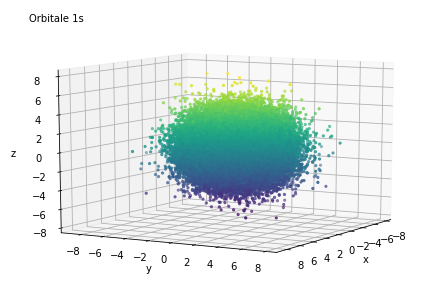

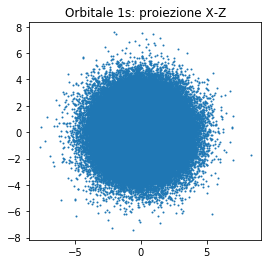

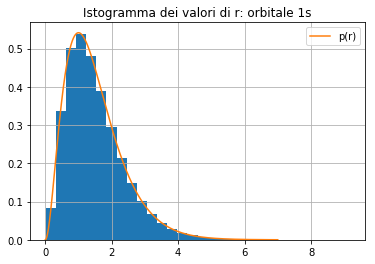

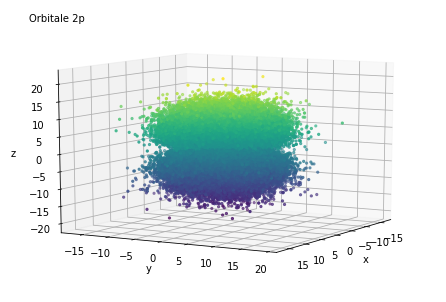

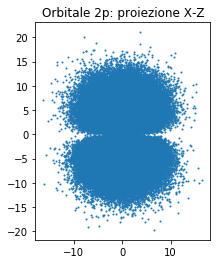

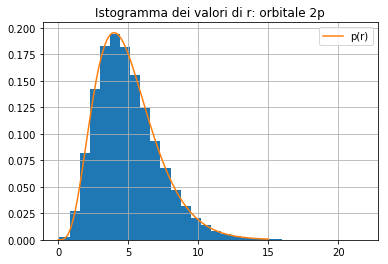

In [1]:
%matplotlib inline
from numpy import *
from math import *
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# ORBITALE 1S #
orb1s = genfromtxt('psi1s.dat')
X= orb1s[:,0]
Y= orb1s[:,1]
Z= orb1s[:,2]
r= orb1s[:,3]
fig = plt.figure()
ax = Axes3D(fig)
ax.text2D(0.05, 0.95, 'Orbitale 1s', transform=ax.transAxes)
ax.scatter(X, Y, Z, c=Z, marker='.')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.view_init(10, 30)
plt.show()

fig = plt.figure()
plt.title('Orbitale 1s: proiezione X-Z')
plt.gca().set_aspect('equal', adjustable='box')
plt.plot(X,Z, 'o',markersize=1)
plt.show()

fig=plt.figure()
plt.title('Istogramma dei valori di r: orbitale 1s')
n_bins = 30
plt.hist(r, n_bins, density=True)
x=arange(0,7,0.001)   # Calcolo p(r)
y=zeros(size(x))
for i in range(size(x)):
    y[i]=4*x[i]**2 *exp(-2*x[i])
plt.plot(x,y, label='p(r)')
plt.legend()
plt.grid(True)
plt.show()

# ORBITALE 2P #
orb2p = genfromtxt('psi2p.dat')
X= orb2p[:,0]
Y= orb2p[:,1]
Z= orb2p[:,2]
r= orb2p[:,3]
fig = plt.figure()
ax = Axes3D(fig)
ax.text2D(0.05, 0.95, 'Orbitale 2p', transform=ax.transAxes)
ax.scatter(X, Y, Z, c=Z, marker='.')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.view_init(10, 30)
plt.show()

fig = plt.figure()
plt.title('Orbitale 2p: proiezione X-Z')
plt.gca().set_aspect('equal', adjustable='box')
plt.plot(X,Z, 'o',markersize=1)
plt.show()

fig=plt.figure()
plt.title('Istogramma dei valori di r: orbitale 2p')
n_bins = 30
plt.hist(r, n_bins, density=True)
x=arange(0,15,0.001)   # Calcolo p(r)
y=zeros(size(x))
for i in range(size(x)):
    y[i]=1./24*x[i]**4 *exp(-x[i])
plt.plot(x,y, label='p(r)')
plt.legend()
plt.grid(True)
plt.show()

Questi grafici dimostrano che la scelta dei dati iniziali si è rivelata opportuna per la convergenza dell'algoritmo nel numero di step fissato. Infatti, *provando a inizializzare il sistema molto lontano dall'origine* (a $10$ raggi di Bohr dall'origine del caso 1s e $20$ nel caso 2p) la distribuzione campionata non coincide con quella desiderata e, pur mantenendo le stesse proprietà di simmetria non risulta centrata nell'origine. Ciò perchè se il dato iniziale è in una zona a bassa densità di probabilità, la probabilità di accettazione delle mosse tentative sarà bassa e ciò richiede un numero di passi molto più elevato per l'equilibrazione. <p>

Il calcolo dei valori medi di $r$ ha prodotto il seguente risultato:

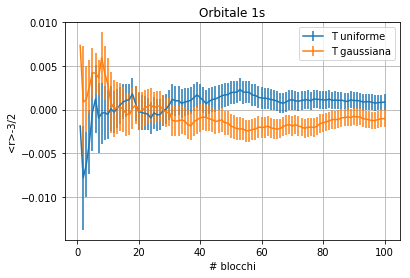

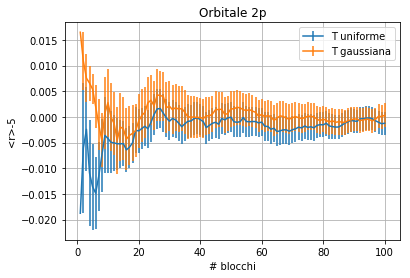

In [2]:
%matplotlib inline
from numpy import *
from math import *
import matplotlib
import matplotlib.pyplot as plt

# ORBITALE 1S #
ru = genfromtxt('rmedio1s_u.dat')
rg = genfromtxt('rmedio1s_g.dat')
plt.figure()
plt.title('Orbitale 1s')
plt.errorbar(ru[:,0], ru[:,2]-1.5, yerr=ru[:,3], label='T uniforme')
plt.errorbar(rg[:,0], rg[:,2]-1.5, yerr=rg[:,3], label ='T gaussiana')
plt.xlabel('# blocchi')
plt.ylabel('<r>-3/2')
plt.grid(True)
plt.legend()
plt.show()

# ORBITALE 2P #
ru = genfromtxt('rmedio2p_u.dat')
rg = genfromtxt('rmedio2p_g.dat')
plt.figure()
plt.title('Orbitale 2p')
plt.errorbar(ru[:,0],ru[:,2]-5, yerr=ru[:,3], label='T uniforme')
plt.errorbar(rg[:,0],rg[:,2]-5, yerr=rg[:,3], label= 'T gaussiana')
plt.xlabel('# blocchi')
plt.ylabel('<r>-5')
plt.grid(True)
plt.legend()
plt.show()

I risultati ottenuti sono compatibili con il valore atteso. Nel primo caso si osserva una stima compatibile al limite di 1 sigma. La precisione relativa dei dati ottenuti si aggira intorno a $\epsilon \sim 10^{-3}$. <p>
Rimane da precisare la questione relativa al numero di blocchi scelto. Poichè l'algoritmo di Metropolis produce configurazioni successive correlate, questo dovrebbe essere scelto in modo che la lunghezza del singolo blocco sia sufficiente da garantirne l'indipendenza statistica rispetto agli altri. Considerazioni di questo genere sono state verificate empiricamente. Varie ripartenze del programma hanno mostrato che è sufficiente già $N=10^4$ (ovvero $L=100$) perchè i valori delle stime e delle loro incertezze siano ragionevoli. Questo è sensato, data la particolare semplicità dell'algoritmo implementato, che campiona una densità di probabilità che dipende da sole tre variabili. Si è scelto $N=100$ per una ragione puramente grafica, ovvero per garantire una buona leggibilità dei vari plot prodotti. <p>
A riprova di ciò si è utilizzato il codice implementato nell'esercitazione 7 per fare uno studio più rigoroso dell'andamento delle incertezze statistiche in funzione del numero dei blocchi e il risultato è riportato in basso (per semplicità solo nel caso di probabilità di transizione uniforme).

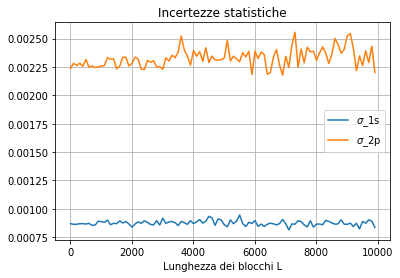

In [6]:
def blockingaverage(X,M,L):
    N=int(M/L)
    ave = zeros(N)
    av2 = zeros(N)
    stima = 0
    stima2 = 0
    err = 0

    for i in range(N):
        somma = 0.0
        for j in range(L):
            k = j+i*L
            ave[i] += X[k]
        ave[i] /= L       # r_i 
        av2[i] = (ave[i])**2 # (r_i)^2 

    for i in range(N):
        stima += ave[i] # SUM_{j=0,i} r_j
        stima2+= av2[i] # SUM_{j=0,i} (r_j)^2
    stima/=N # Cumulative averageVV
    stima2/=N # Cumulative square average
    err = sqrt((stima2 - stima**2)/N) # Statistical uncertainty
    return stima , err

orb1s = genfromtxt('psi1s.dat')
orb2p = genfromtxt('psi2p.dat')  

L=arange(10,10000, 100) #lenght of a block
orb1s_medio=zeros(size(L))
orb2p_medio=zeros(size(L))
sigma_1s=zeros(size(L))
sigma_2p=zeros(size(L))

for i in range(size(L)):
    orb1s_medio[i] , sigma_1s[i] = blockingaverage(orb1s[:,3],size(orb1s[:,3]),L[i])
    orb2p_medio[i] , sigma_2p[i] = blockingaverage(orb2p[:,3],size(orb2p[:,3]),L[i])
    
plt.plot(L, sigma_1s, label='$\sigma$_1s')
plt.plot(L, sigma_2p, label='$\sigma$_2p')
plt.title('Incertezze statistiche')
plt.xlabel('Lunghezza dei blocchi L')
plt.grid(True)
plt.legend()
plt.show()